In [174]:
#Analysis of accidents by bicycle in Madrid for the years 2019-2021
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import seaborn as sns

#Import file
url= 'https://raw.githubusercontent.com/RAnalyst1111/AccidentesBici.csv/main/AccidentesBicicletas_2021-20-19.csv?token=AVMOD7A4SHR3U6JKW5TM25DBYOMKO'
df=pd.read_csv(url, sep=';', header=0)

#Looking at the data
df.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2021S000047,01/01/2021,11:38:00,CALL. JOSE BERGAMIN / CALL. FLORENCIO CANO CRI...,62,MORATALAZ,Caída,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2.0,"446334,56","4473592,52",N,NaN
1,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 15 a 17 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
2,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 18 a 20 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
3,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
4,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 50 a 54 años,Hombre,6.0,"448572,73","4476253,86",N,NaN


In [98]:
#Looking if there is any missing data

for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))


num_expediente-0.0%
fecha-0.0%
hora-0.0%
localizacion-0.0%
numero-0.0%
distrito-0.0%
tipo_accidente-0.0%
estado_meteorológico-0.027510917030567687%
tipo_vehiculo-0.0%
tipo_persona-0.0%
rango_edad-0.0%
sexo-0.0%
lesividad-0.11746724890829695%
coordenada_x_utm-0.0%
coordenada_y_utm-0.0%
positiva_alcohol-0.0017467248908296944%
positiva_droga-0.9982532751091703%


In [99]:
#Detecting NaN values

lesividadnull= df[df['lesividad'].isnull()]
lesividadnull.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
5,2021S000204,05/01/2021,16:35:00,"PLAZA EMPERADOR V, Nº11",11,CENTRO,Colisión fronto-lateral,Despejado,Bicicleta,Conductor,De 18 a 20 años,Hombre,NaN,"441236,76","4473384,94",N,NaN
9,2021S000806,22/01/2021,23:25:00,"CALL. BRAVO MURILLO, 97",97,CHAMBERÍ,Caída,NaN,Bicicleta,Conductor,De 25 a 29 años,Hombre,NaN,"440286,06","4477540,86",N,NaN
10,2021S000898,24/01/2021,15:35:00,CALL. ALMIRANTE / PASEO. RECOLETOS,32,CENTRO,Colisión fronto-lateral,NaN,Bicicleta,Conductor,De 30 a 34 años,Hombre,NaN,"441266,26","4474871,08",N,NaN
15,2021S001084,26/01/2021,23:10:00,"CALL. GRAN VIA, 66",66,CENTRO,Colisión lateral,Despejado,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"439858,99","4474883,96",N,NaN
20,2021S001209,29/01/2021,14:55:00,CALL. BRAVO MURILLO / CALL. SANTA JULIANA,163,TETUÁN,Colisión fronto-lateral,NaN,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"440360,84","4478220,58",N,NaN


In [100]:
#Detecting NaN values
pos_alcoholnull= df[df['positiva_alcohol'].isnull()]
pos_alcoholnull.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
298,2021S009635,01/06/2021,11:05:00,GTA. EMBAJADORES / RONDA. VALENCIA,1,CENTRO,Atropello a persona,Despejado,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"440389,33","4473013,5",NaN,NaN
722,2020S007621,29/05/2020,21:25:00,"CALL. MAYOR, 59",59,CENTRO,Atropello a persona,Despejado,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"439781,81","4474128,57",NaN,NaN
1826,2019S025453,04/07/2019,1:20:00,CALL. CASINO / CALL. SANTIAGO EL VERDE,1,CENTRO,Colisión lateral,NaN,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"440209,94","4473157,72",NaN,NaN
2155,2019S033667,22/10/2019,20:00:00,"PASEO. PRADO, 14",14,CENTRO,Alcance,Lluvia débil,Bicicleta,Conductor,Desconocido,Desconocido,NaN,"441098,97","4473967,18",NaN,NaN


In [101]:
#Detecting NaN values
pos_droganull= df[df['positiva_droga'].isnull()]
pos_droganull.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2021S000047,01/01/2021,11:38:00,CALL. JOSE BERGAMIN / CALL. FLORENCIO CANO CRI...,62,MORATALAZ,Caída,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2.0,"446334,56","4473592,52",N,NaN
1,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 15 a 17 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
2,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 18 a 20 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
3,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
4,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 50 a 54 años,Hombre,6.0,"448572,73","4476253,86",N,NaN


In [102]:
#Replacing NaN values
df['lesividad'].fillna(value=df['lesividad'].mean(),inplace=True)
df['positiva_alcohol'].fillna(value='N',inplace=True)
df['positiva_droga'].fillna(value='N',inplace=True)

#Looking if there is any missing data after replacing NaN values
for col in df.columns:
    pct_missing= np.mean(df[col].isnull())
    print('{}-{}%'.format(col,pct_missing))


num_expediente-0.0%
fecha-0.0%
hora-0.0%
localizacion-0.0%
numero-0.0%
distrito-0.0%
tipo_accidente-0.0%
estado_meteorológico-0.027510917030567687%
tipo_vehiculo-0.0%
tipo_persona-0.0%
rango_edad-0.0%
sexo-0.0%
lesividad-0.0%
coordenada_x_utm-0.0%
coordenada_y_utm-0.0%
positiva_alcohol-0.0%
positiva_droga-0.0%


In [103]:
#Data types for every columns
df.dtypes

num_expediente           object
fecha                    object
hora                     object
localizacion             object
numero                   object
distrito                 object
tipo_accidente           object
estado_meteorológico     object
tipo_vehiculo            object
tipo_persona             object
rango_edad               object
sexo                     object
lesividad               float64
coordenada_x_utm         object
coordenada_y_utm         object
positiva_alcohol         object
positiva_droga           object
dtype: object

In [104]:
#Changing data types of columns
df['fecha']= df['fecha'].astype('datetime64')

#Data types for every columns after change
df.dtypes

num_expediente                  object
fecha                   datetime64[ns]
hora                            object
localizacion                    object
numero                          object
distrito                        object
tipo_accidente                  object
estado_meteorológico            object
tipo_vehiculo                   object
tipo_persona                    object
rango_edad                      object
sexo                            object
lesividad                      float64
coordenada_x_utm                object
coordenada_y_utm                object
positiva_alcohol                object
positiva_droga                  object
dtype: object

In [135]:
#Order values by "distrito"

df.sort_values(by=['distrito'], inplace=False,ascending=True)

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
545,2020S003545,2020-02-14,20:58:00,1632,27,0,6,5,0,0,5,1,5.868382,620,393,0,1
1898,2019S027418,2019-07-30,19:05:00,1220,297,0,5,0,0,0,5,1,14.000000,254,496,0,1
1896,2019S027369,2019-07-29,13:15:00,924,159,0,6,0,0,0,4,1,7.000000,223,642,0,1
1044,2020S011624,2020-08-24,21:10:00,1704,145,0,0,-1,1,0,1,1,14.000000,796,484,0,1
420,2021S013471,2021-07-27,12:50:00,410,90,0,9,0,0,0,7,1,7.000000,890,422,0,1
419,2021S013434,2021-07-26,15:50:00,1700,27,0,0,0,0,0,5,1,14.000000,842,512,0,1
1054,2020S011699,2020-08-26,20:50:00,714,27,0,2,0,0,0,8,1,14.000000,815,390,0,1
1055,2020S011699,2020-08-26,20:50:00,714,27,0,2,0,0,2,4,2,14.000000,815,390,0,1
1056,2020S011699,2020-08-26,20:50:00,714,27,0,2,0,0,2,5,2,7.000000,815,390,0,1
414,2021S013299,2021-07-22,16:40:00,593,284,0,6,0,0,0,8,1,7.000000,447,465,0,1


In [113]:
pd.set_option('display.max_rows',None)

In [ ]:
# estado_metereologico high correlation
# tipo_accidente high correlation

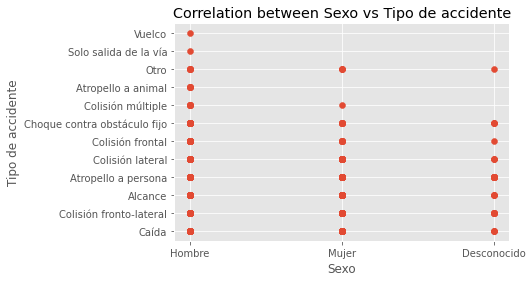

In [117]:
#Scatter Plot with Distrito and tipo_accidente

#plt.scatter(x=df['sexo'],y=df['tipo_accidente'])
#plt.title('Correlation between Sexo vs Tipo de accidente')
#plt.xlabel('Sexo')
#plt.ylabel('Tipo de accidente')
#plt.show()


In [170]:
#Plot Distrito and tipo_accidente using seaborn

#sns.regplot(x='distrito',y='tipo_accidente', data=df, scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [120]:
df.corr()

,lesividad
lesividad,1.0


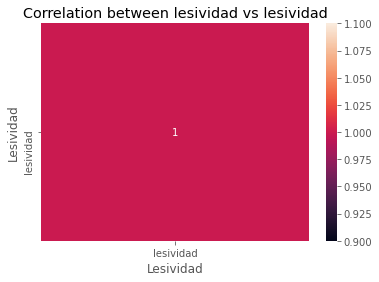

In [129]:
correlation_matrix= df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation between lesividad vs lesividad')
plt.xlabel('Lesividad')
plt.ylabel('Lesividad')

plt.show()

#As you can see, I am not able to do a good correlation analysis because there are 'object' column type.
#Next step is starting to work with those 'object' column

In [171]:
#Changing 'object' to 'category' and assign an unique number to any 'object' field

df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]= df_numerized[col_name].cat.codes
        
df_numerized.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,1614,1,53,859,258,11,3,0,0,0,8,1,2.0,1546,608,0,NaN
1,1615,81,51,1858,27,15,3,0,0,0,1,1,14.0,1692,1179,0,NaN
2,1615,81,51,1858,27,15,3,0,0,0,2,1,14.0,1692,1179,0,NaN
3,1615,81,51,1858,27,15,3,0,0,0,3,1,14.0,1692,1179,0,NaN
4,1615,81,51,1858,27,15,3,0,0,0,9,1,6.0,1692,1179,0,NaN


In [175]:
#Comparing the results
df.head()

,num_expediente,fecha,hora,localizacion,numero,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2021S000047,01/01/2021,11:38:00,CALL. JOSE BERGAMIN / CALL. FLORENCIO CANO CRI...,62,MORATALAZ,Caída,Despejado,Bicicleta,Conductor,De 45 a 49 años,Hombre,2.0,"446334,56","4473592,52",N,NaN
1,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 15 a 17 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
2,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 18 a 20 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
3,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 21 a 24 años,Hombre,14.0,"448572,73","4476253,86",N,NaN
4,2021S000142,04/01/2021,11:30:00,WANDA METROPOLITANO PARQUE FAROLA 20,1,SAN BLAS-CANILLEJAS,Caída,Despejado,Bicicleta,Conductor,De 50 a 54 años,Hombre,6.0,"448572,73","4476253,86",N,NaN


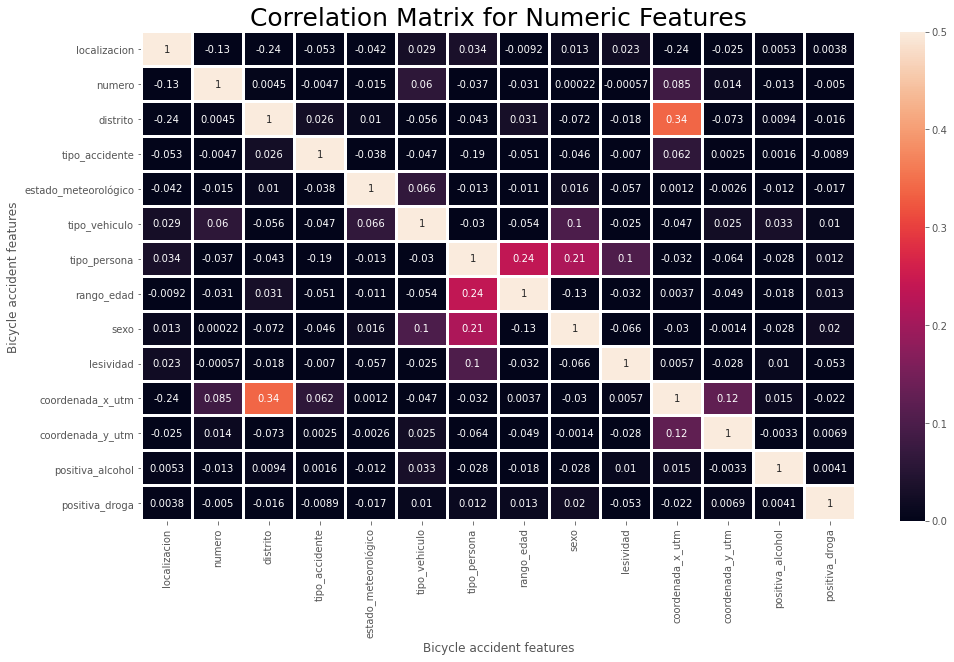

In [159]:
correlation_matrix= df_numerized.corr(method='pearson')
plt.figure(figsize=(16,9))
sns.heatmap(correlation_matrix, annot=True, linewidth=2, vmin=0, vmax=0.5)

plt.title('Correlation Matrix for Numeric Features', fontsize=25)
plt.xlabel('Bicycle accident features')
plt.ylabel('Bicycle accident features')

plt.show()

In [161]:
#Correlation unstacking

correlation_mat= df_numerized.corr()
corr_pairs= correlation_mat.unstack()
corr_pairs

localizacion          localizacion            1.000000
                      numero                 -0.126298
                      distrito               -0.235520
                      tipo_accidente         -0.052511
                      estado_meteorológico   -0.042014
                      tipo_vehiculo           0.029081
                      tipo_persona            0.034366
                      rango_edad             -0.009151
                      sexo                    0.012943
                      lesividad               0.023356
                      coordenada_x_utm       -0.242691
                      coordenada_y_utm       -0.025043
                      positiva_alcohol        0.005335
                      positiva_droga          0.003765
numero                localizacion           -0.126298
                      numero                  1.000000
                      distrito                0.004523
                      tipo_accidente         -0.004678
          

In [162]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

localizacion          coordenada_x_utm       -0.242691
coordenada_x_utm      localizacion           -0.242691
distrito              localizacion           -0.235520
localizacion          distrito               -0.235520
tipo_persona          tipo_accidente         -0.188832
tipo_accidente        tipo_persona           -0.188832
rango_edad            sexo                   -0.127495
sexo                  rango_edad             -0.127495
numero                localizacion           -0.126298
localizacion          numero                 -0.126298
distrito              coordenada_y_utm       -0.073105
coordenada_y_utm      distrito               -0.073105
distrito              sexo                   -0.072027
sexo                  distrito               -0.072027
lesividad             sexo                   -0.065993
sexo                  lesividad              -0.065993
tipo_persona          coordenada_y_utm       -0.064094
coordenada_y_utm      tipo_persona           -0.064094
lesividad 

In [167]:
#Finding the highest correlations

high_corr= sorted_pairs[(sorted_pairs)>0.05]
high_corr

numero                tipo_vehiculo           0.060467
tipo_vehiculo         numero                  0.060467
tipo_accidente        coordenada_x_utm        0.062084
coordenada_x_utm      tipo_accidente          0.062084
estado_meteorológico  tipo_vehiculo           0.066059
tipo_vehiculo         estado_meteorológico    0.066059
numero                coordenada_x_utm        0.084826
coordenada_x_utm      numero                  0.084826
tipo_vehiculo         sexo                    0.101219
sexo                  tipo_vehiculo           0.101219
lesividad             tipo_persona            0.101989
tipo_persona          lesividad               0.101989
coordenada_y_utm      coordenada_x_utm        0.123822
coordenada_x_utm      coordenada_y_utm        0.123822
tipo_persona          sexo                    0.214361
sexo                  tipo_persona            0.214361
rango_edad            tipo_persona            0.236972
tipo_persona          rango_edad              0.236972
distrito  

In [169]:
#The following variable has the highest correlations:
#tipo_persona          rango_edad              0.236972

#It is an error to take the followings variables as the highest correlations variables:
#distrito              coordenada_x_utm        0.339654
#coordenada_x_utm      distrito                0.339654
#localizacion          localizacion            1.000000
#coordenada_y_utm      coordenada_y_utm        1.000000
#coordenada_x_utm      coordenada_x_utm        1.000000
#lesividad             lesividad               1.000000
#sexo                  sexo                    1.000000
#rango_edad            rango_edad              1.000000
#tipo_persona          tipo_persona            1.000000
#tipo_vehiculo         tipo_vehiculo           1.000000
#estado_meteorológico  estado_meteorológico    1.000000
#tipo_accidente        tipo_accidente          1.000000
#distrito              distrito                1.000000
#numero                numero                  1.000000
#positiva_alcohol      positiva_alcohol        1.000000
#positiva_droga        positiva_droga          1.000000

#because those values where calculated between the same variables or there is no proper logical correlation between variables.